# Heat-Wave Risk assessment

The goal is:

Based on the current climate scenarious the occurrence of the heat-wave phenomenon should be more frequent in the future in Europe. The main problems connected with Heat-wave events are the overheating of the urban areas, which lowers comfort of living or causes health issues [https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2022EF002682], drought, and water scarcity. Nowadays, there are a lot of studies and methodologies on how we can mitigate the influence of these events. This toolbox wants to answer a simple questions which are more frequently ask by the crisis managemnt local authorities, urban planers or policy makers. These questions are:

- Where we can expect? (places and magnitude)
- How often? (frequency of the occurence)
- How to prevent? (mitigation measures)

  sources [https://github.com/dargueso/EHF/blob/master/compute_EHFheatwaves.py]

# Import packages

If there be some problems with the instalation of the packages, please let me know. I experience difficulties with the cartopy package on Windows. 

In [8]:
import zipfile        # working with the zip folders #
import os             # handling the current working directory
import rasterio       # netcdf and raster processing  #
from pathlib import Path # file system paths
import rioxarray as rxr # netcdf and raster processing
import cdsapi         # API downloading
import numpy as np    # 2-3D array data handling
import pandas as pd   # data handling #
import xarray as xr   # 2-3D array data handling 
#from osgeo import gdal # Geo data handling 
import cartopy.crs as ccrs # netcdf data projection 
import cartopy.feature as cf # netcdf data projection 
import cartopy.crs as ccrs # netcdf data projection 
import matplotlib as mpl  #  data plot #
import matplotlib.pyplot as plt #  data plot #
from rasterio.crs import CRS  #  raster dat handling 
from pylab import pcolormesh,show,colorbar,plot,title,legend,subplot,savefig
from xrspatial.classify import reclassify
from matplotlib import pyplot
from rasterio.plot import show
from glob import glob
import geopandas as gpd
import rasterio as rio

# Create a directory structure

In [2]:
# Define the directory for the flashflood workflow preprocess
workflow_folder = 'Heat_workflow'

# Define directories for data and results within the previously defined workflow directory
data_dir = os.path.join(workflow_folder,'data')
results_dir = os.path.join(workflow_folder,'results')

# Check if the workflow directory exists, if not, create it along with subdirectories for data and results
if not os.path.exists(workflow_folder):
    os.makedirs(workflow_folder)
    os.makedirs(os.path.join(data_dir))
    os.makedirs(os.path.join(results_dir))

# 1. Trends of the Heat-Days/Nights occurence 

- On the website Climate-adapt we can find the tredns of the occurence of the days with Extreme heat. The content in the European Climate Data Explorer pages is delivered by the Copernicus Climate Change Service (C3S) implemented by ECMWF. 
- We select the region of Slovakia where we can also find the Zilina city, this is the estimation for the whole region NUTS2
- Our toolbox in the next steps will provide an informations from a closer perspective over the Zilina city and Europe.

https://climate-adapt.eea.europa.eu/en/metadata/indicators/high-utci-days


### Heat days occurence in the past

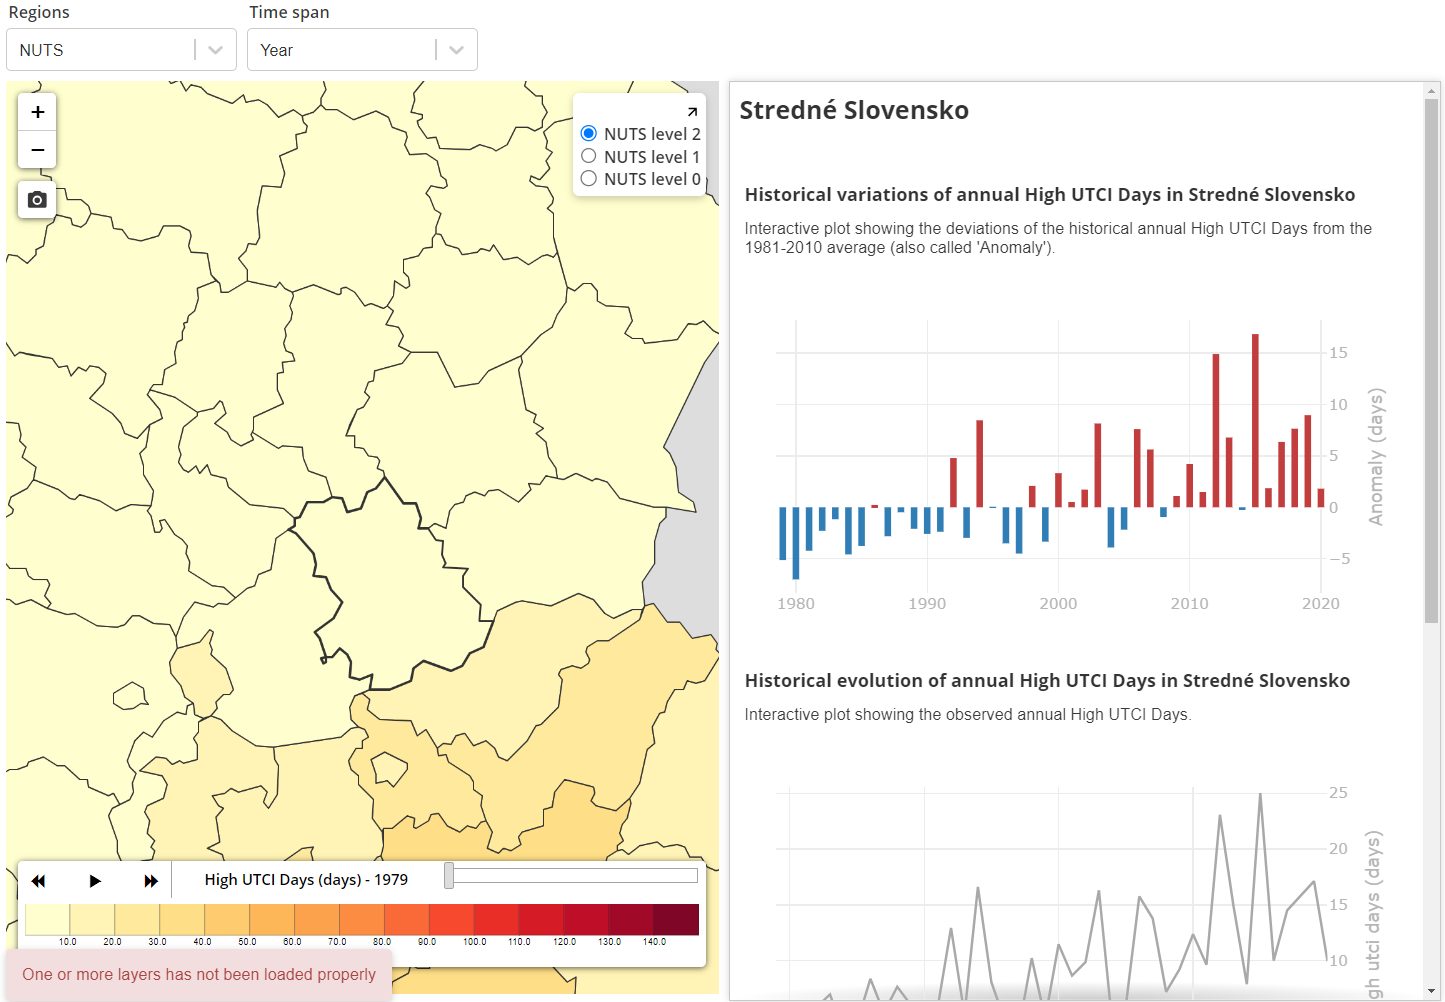

### Heat days occurence in the future

https://climate-adapt.eea.europa.eu/en/metadata/indicators/apparent-temperature-heatwave-days

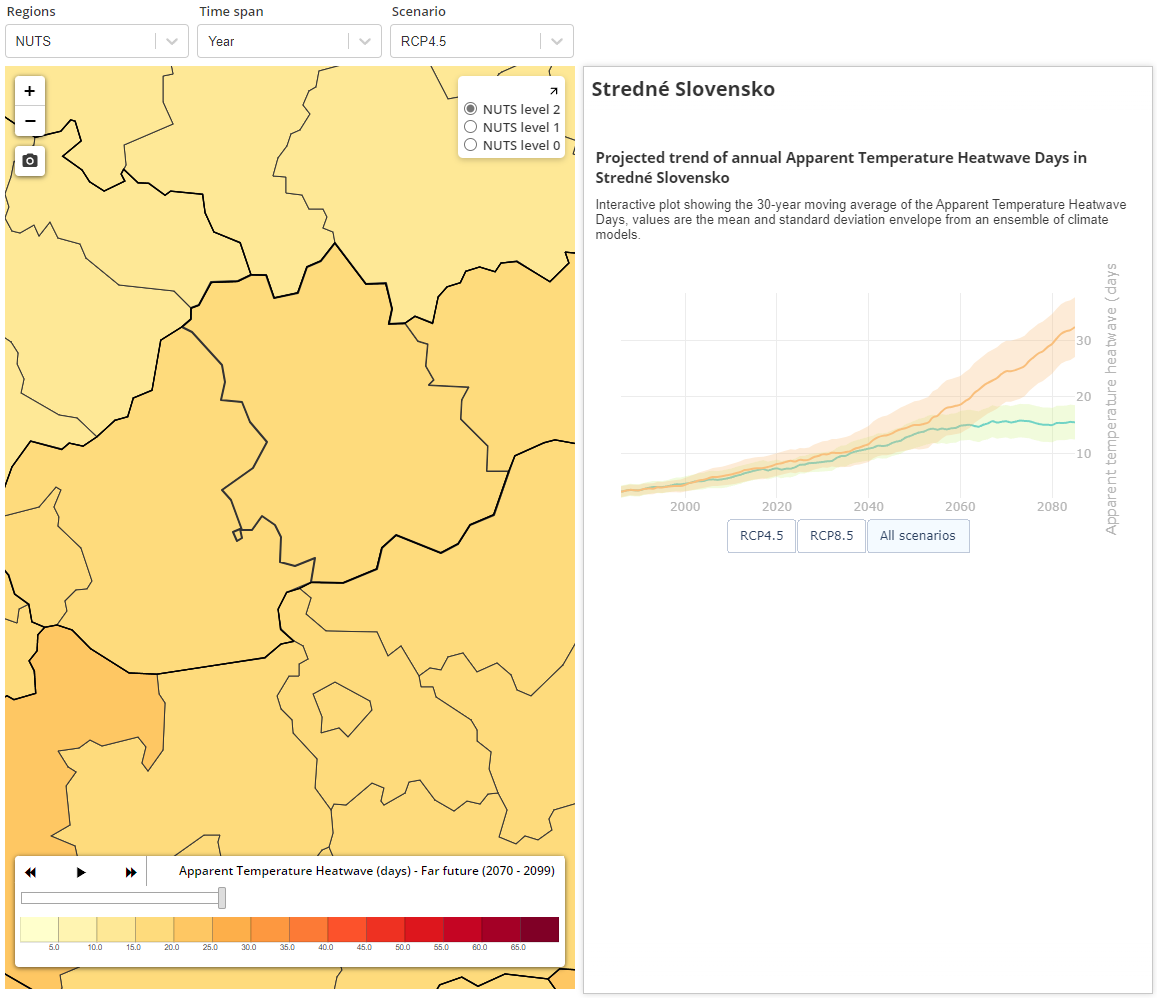

### Tropical night past and projections 

[https://climate-adapt.eea.europa.eu/en/observatory/++aq++metadata/indicators/tropical-nights/]

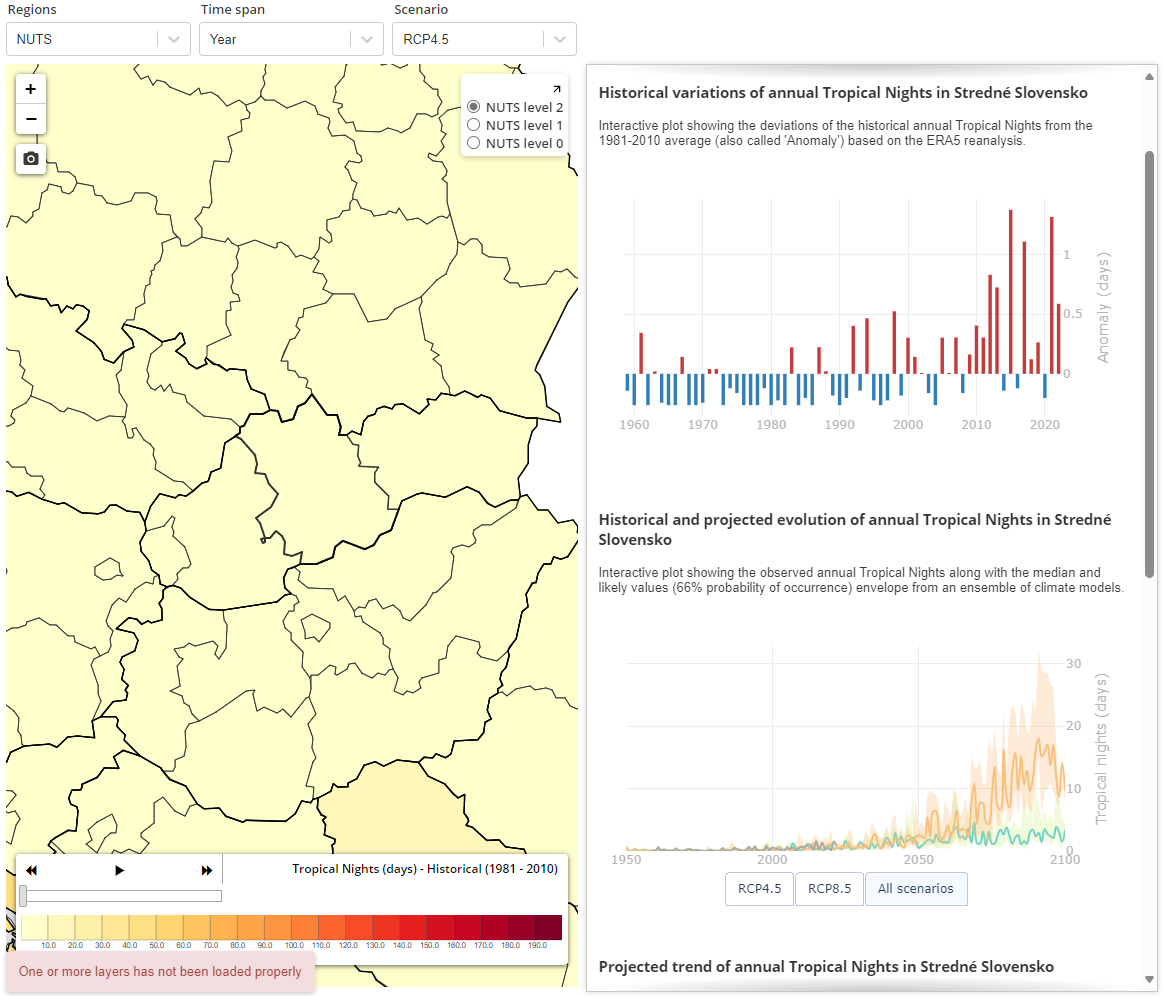

# Observed temperature over Europe 

In this part of the notebook we go to the smaller scale than NUTS2. These data give us the information about the the observed tempperature over the Europe. These data also help us find the time periods with higher air temperature for the selection of the Landsat8 images. 

### Observed temperature Europe 2011-2023

In [ ]:
# This takes time!!!
# Change KEY!!!
URL = "https://cds.climate.copernicus.eu/api/v2"
KEY = "152800:1c6ca43d-189d-48d1-9bef-b571c3f35f34"
c = cdsapi.Client(url=URL, key=KEY)

zip_path = os.path.join(data_dir, 'eobs_airtemp_2011_2023.zip')

c.retrieve(
    'insitu-gridded-observations-europe',
    {
        'product_type': 'ensemble_mean',
        'variable': 'maximum_temperature',
        'grid_resolution': '0.1deg',
        'period': '2011_2023',
        'version': '28.0e',
        'format': 'zip',
    },
   f"{data_dir}/eobs_airtemp_EU_2011_2023.zip")

In [ ]:
# Define zip file's absolute path
zip_path = os.path.join(data_dir, 'eobs_airtemp_EU_2011_2023.zip')
# Extract from zip file
with zipfile.ZipFile(zip_path, 'r') as zObject:
    zObject.extractall(path=data_dir)

# 2 Heat islands identification

#### Heat islands

Heat islands are urbanized areas that experience higher temperatures than outlying areas. Structures such as buildings, roads, and other infrastructure absorb and re-emit the sun’s heat more than natural landscapes such as forests and water bodies. Urban areas, where these structures are highly concentrated and greenery is limited, become “islands” of higher temperatures relative to outlying areas. [https://www.epa.gov/heatislands]
For the identification of the heat islands from the historical data we can use these data:

Data, needs to be manually downloaded from provided websites, it requires registration and manual choosing of your area and time period (except Euro-Cordex):

#### Historical data from satelite sensors:

- Landsat8 land surface temperature (LST) for the 2016-2020 (15-30m spatial; 8-16 days tremporal). For the identification of the heat island we can use this product, which provide the data about calculated land surface temperature from the Landsat8 imagery. The LST product is available on the RSLAB website, or can be calculated from the L8 imagery bands.
Download: https://rslab.gr/downloads_LandsatLST.html ### https://rslab.gr/Landsat_LST.html (only for 2015-2021) ## recalculation of the LST from Landsat8 imagery https://earth.esa.int/eogateway/catalog/landsat-8-collection-2-european-coverage


- Sentinel3 LST # https://www.youtube.com/watch?v=GbQOZJC6Jgc #
 https://dataspace.copernicus.eu/browser/?zoom=12&lat=49.178&lng=18.89992&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fsh.dataspace.copernicus.eu%2Fogc%2Fwms%2Fa91f72b5-f393-4320-bc0f-990129bd9e63&datasetId=S2_L2A_CDAS 

### Landsat 8, July 2016 land surface temperature 8 days composite

We can use LST for the summer months (June, July, August) wherewe can expect the overheating of the urban areas. Based on the LST we can easily identified the heat islands (Dark Red areas).

- for the best estimation of the overheated areas it is best to consult the selection of the days with local Meteorological authorities, they can provide the data about measured air temperature from past. 
- or you can look at the at the observed ait temperature in CDS: https://cds.climate.copernicus.eu/cdsapp#!/dataset/insitu-gridded-observations-europe?tab=form

for Calculation: https://www.youtube.com/watch?v=hd7fscNTff4 for Download:  https://rslab.gr/Landsat_LST.html (for years 2016-2021)

### Selecting a time periods for Landsat8 LST

Selecting of the summer months for the observed period 2011-2023
1. Select a time period, for the heat select a summer months from the year 2016 (because of the availability of the Landsat8 data)
2. Plot the data and find the dates with highest temperature 
3. Select a time period with highest air temperature

In [12]:
# Read a data 
at = xr.open_mfdataset(f'{data_dir}/tx_*.nc', decode_coords='all') # to read a multiple datasets 
at.rio.write_crs("epsg:4326", inplace=True)
at=at['tx']
atEU=at
at_city=at.rio.clip_box(minx=18.67, miny=49.175, maxx=18.8, maxy=49.250)
# Delete the data from memory
del at

In [18]:
# select a time window 
at_year=at_city.sel(time=slice("2022-05-01", "2022-09-30")) # Change the dates for specific year

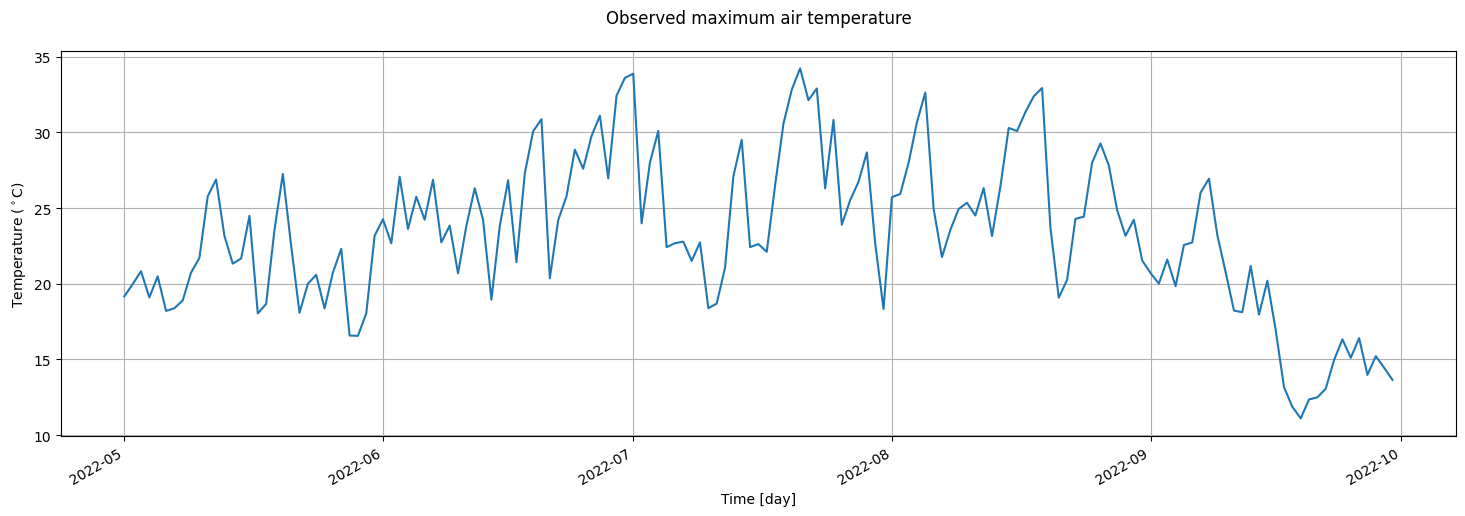

In [20]:
fig, ax=plt.subplots(figsize=(18,5))
#at_2011.isel(longitude= [0,1,2], latitude=1).plot.line(x="time")
at_year.isel(longitude= 1, latitude=1).plot.line(x="time")
#at_city[0,:,:].plot(ax=ax)
#CI_WGS.plot(ax=ax, color='red')

ax.set_title('Observed maximum air temperature', pad = 20)
ax.set_xlabel('Time [day]')
ax.set_ylabel('Temperature ($^\circ$C)')
ax.grid(True)

### Landsat8 Land surface temperature

1. You can dowload the precomputed values from the RSlab webportal for years 2016-2021 # https://rslab.gr/Landsat_LST.html
2. Or you can calculate the LST directly from the Landsat imagery # 
 https://www.youtube.com/watch?v=hd7fscNTff4
3. You can download a multiple satelite pictures and combine it together, with goal o finding the best posible picture. 

Open https://rslab.gr/Landsat_LST.html and download a LST for selected period:
How to use the application:
-  Draw a polygon on the map by clicking (not dragging) on the map in order to select vertices of the polygon.- ) Select your preffered Landsat source. Please check the availabillity for each Landsat above.It is recommended to use MODIS and NDVI-based emmisivity for Urban/Peri-Urban areas and ASTER emissivity for Natural/Isolated areas. Refer to the paper for more details- 3) Select your preffered emissivity source. Please check the important notes above about emissivity. For more details on this subject please refer to the pape- 
4) Click the "Calculate LST" butt- 
5) The results will be presented below the map. For each LST result you will find a "show" button that displays the LST as a layer on the map and calculates the mean/min/max LST value for the selected image. Also for each LST result you will find a "download" button that downloads the LST as a .tiff image. In order to download all the images click the "download all" button at the end of the list. The downloaded .tiff is cut based on your polygon.
 -how a LST and download a maps with good data coverage (based on the clouds, clouds=nodata)
 - Save data to you Heat_workflow folder -> data_dir
 - And then you can continue with the following code.

In [4]:
# Load a data and crate a raster stack from all maps
L8list = glob(f"{data_dir}/*LST.tif")
#
with rasterio.open(L8list[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(L8list))
# Save a data to working directory
with rasterio.open(f'{data_dir}/Landsat8_raster_stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(L8list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

Text(0.5, 1.0, 'Overheated areas in Zilina city')

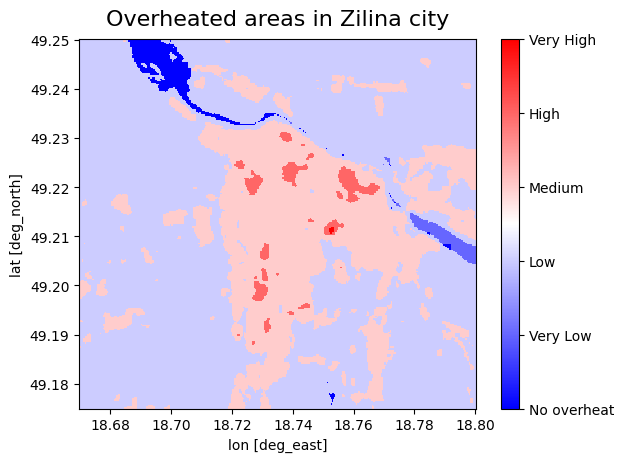

In [21]:
# Laod a data calculate a maximum values from raster stack
L8 =f'{data_dir}/Landsat8_raster_stack.tif'
L8 = xr.open_dataset(L8)
L8=L8.max(dim='band', skipna=True,  keep_attrs=True)
L8lst2016=L8['band_data']
L8lst2016=L8lst2016.rio.clip_box(minx=18.67, miny=49.175, maxx=18.8, maxy=49.250)
# Reclasiffy data to the groups by the temperature 
lc_bins=[0,20, 30, 40, 50, 100]
lc_values=[0, 1, 2, 3, 4, 5]
lc_class = reclassify(L8lst2016, bins=lc_bins, new_values=lc_values)
# Plot a data
fig, ax = plt.subplots()
oa = lc_class.plot(ax = ax, cmap='bwr', add_colorbar=False)
cbar = fig.colorbar(oa, ticks=[0, 1, 2, 3, 4, 5])
cbar.ax.set_yticklabels(['No overheat', 'Very Low', 'Low', 'Medium', 'High', 'Very High'], size=10)
ax.set_xlabel('lon [deg_east]')
ax.set_ylabel('lat [deg_north]')
plt.title('Overheated areas in Zilina city', size=16, pad = 10)

In [31]:
# Save data on disk
lc_class.rio.to_raster(raster_path=f'{results_dir}/LSTZA.tif')

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/classify-plot-raster-data-in-python/

### Calculation of the Landsat LST from Landsat 8 - 9 imagery

Calculation of the Landsat LST from Landsat 8 - 9 imagery
data are from european space agency: https://earth.esa.int/eogateway/catalog/landsat-8-collection-2-european-coverage
For the data download you need to choose the level of the data L1 or L2.
L1 level contains all 11 bands
L2 level contains bands 1-7 and band 10
We need to download the L8-9: https://www.youtube.com/watch?v=Eug32jeK8Gw

data: https://earth.esa.int/eogateway/catalog/landsat-8-collection-2-european-coverage

process: https://www.youtube.com/watch?v=hd7fscNTff4

### You do not need to calculate you can download it from https://rslab.gr/Landsat_LST.html for years 2016-2021

In [ ]:
# Radiance
rad=0.00033420 * b10 + 0.1

In [ ]:
# Brightest temperature
bt=1321.0789/np.log(774.8853/rad + 1)-272.15

In [ ]:
# Normalized difference vegetation index
ndvi=(b5-b4)/(b5+b4)
ndvi_min=ndvi.min(skipna=True)
ndvi_max=ndvi.max(skipna=True)

In [ ]:
# Proportion of the Vegetation 
pv=((ndvi +  ndvi_min)/(ndvi_max+ndvi_min))**2

In [ ]:
# emisivity
emi=0.004*pv+0.986

In [ ]:
# land surface temperature
LST=(bt+1)+10.8*(bt/14380)*np.log(emi)

# 3. Exposure and vulnerability of the population 


- We can use the maps of the distribution of the population across the interested area and look if the most populated areas overlay with the most overheated parts. 

- For the Zilina pilot, we collected data from the Zilina municipality office about the buildings that are usually crowded with huge masses of people, e.g. hospitals, stadiums, main squares, big shopping centres, main roads, and bigger factories...  

- If places like these are overheated, a huge number of people can be negatively influenced by the Heat. With that, the risk probability also rises, and thus, these areas are prioritized for the Heat mitigation measures.  

### Critical infrastructure for Zilina city (overcrowded places) 

In [5]:
ci=f'{data_dir}/ci_features_ZA.shp'
CI=gpd.read_file(ci)
CI_WGS=CI.to_crs(epsg=4326)

### Vulnerable population

 sources:
- https://data.humdata.org/dataset/worldpop-age-and-sex-structures-for-slovakia
- https://data.humdata.org/dataset?dataseries_name=Data%20for%20Good%20at%20Meta%20-%20High%20Resolution%20Population%20Density%20Maps%20and%20Demographic%20Estimates&groups=alb&q=&sort=last_modified%20desc&ext_page_size=25
 
 1. you need to select in the Data Series palete - High Resolution Population Density Maps + Demographic Estimates
 2. Download the maps for the most vulnerable groups of the population seniors 65+ years and children under 5years 
 3. When you downloaded all these maps to the Heat-workflow data folder you  can youse this code for data handling:
     - in the first step we load all the maps of the critical population 
     - then we caculate the sum of the vulnerable population from each of the maps
     - we classified the maps to 5 groups (equal interval)
     - plot it next to map of overheated areas.


In [7]:
S2list = glob( f'{data_dir}/svk*')
#
with rasterio.open(S2list[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(S2list))
#
with rasterio.open(f'{data_dir}/Population_raster_stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(S2list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

In [8]:
pop=f'{data_dir}/Population_raster_stack.tif'
pop = xr.open_dataset(pop)
pop=pop.sum(dim='band', skipna=True,  keep_attrs=True)
pop=pop['band_data']
pop=pop.rio.clip_box(minx=18.67, miny=49.175, maxx=18.8, maxy=49.250)
# reclass of the population map by the density of the vulnerable group of people over 65+ years
# 0 - = without population
# 0 - 0.6 = low density
# 0.6 - 1.2 = medium density
# 1.2 - 1.8 = high density 
pop_bins=[0, 0.3, 0.6, 0.9, 1.2, 1.5]
pop_values=[0, 1, 2, 3, 4, 5]
pop_class = reclassify(pop, bins=pop_bins, new_values=pop_values)

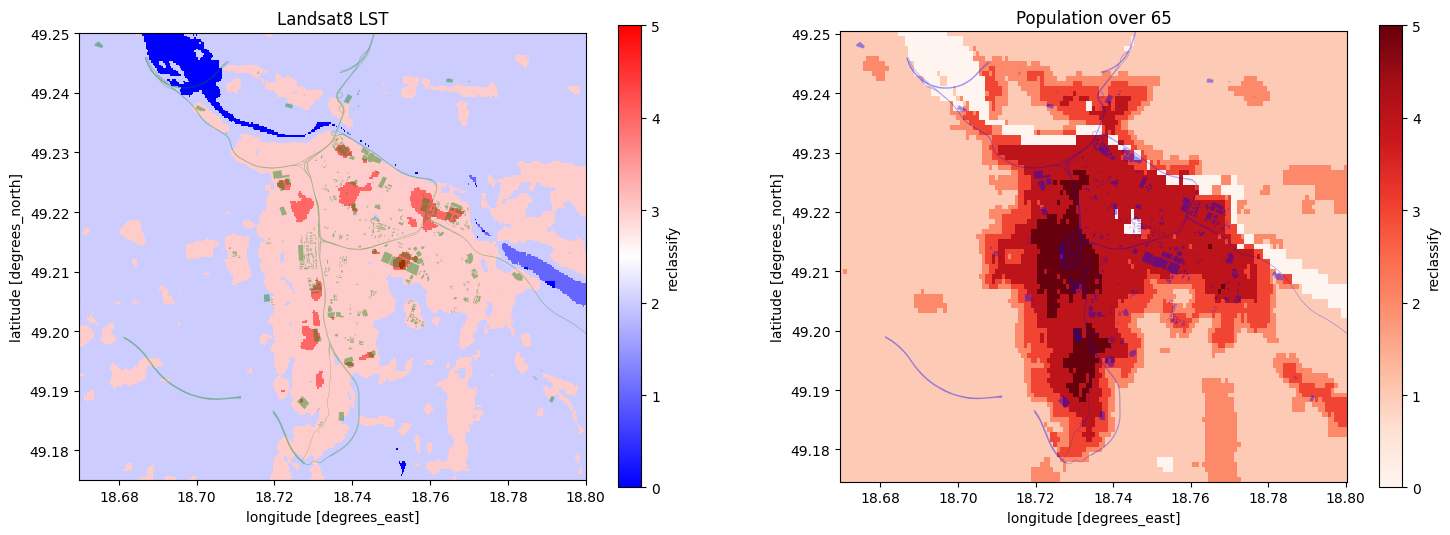

In [9]:
# plot of the Landsat8 LST and population concetration over specified age 
fig, axes=plt.subplots(ncols=2, figsize=(18,6))
lc_class.plot(ax=axes[0], cmap='bwr')
axes[0].set_title('Landsat8 LST')
CI_WGS.plot(ax=axes[0], color='green', alpha=0.4) 
pop_class.plot(ax=axes[1], cmap='Reds')
axes[1].set_title('Population over 65')
CI_WGS.plot(ax=axes[1], color='blue', alpha=0.4)
plt.draw()

Save data on the disk

In [ ]:
lc_class.rio.to_raster(raster_path=f'{results_dir}/risk_LST.tif')
pop_class.rio.to_raster(raster_path=f'{results_dir}/risk_pop.tif')

Load of the data 

In [10]:
S2list = glob( f'{results_dir}/risk_*.tif')
#
with rasterio.open(S2list[0]) as src0:
    meta = src0.meta
#
meta.update(count = len(S2list))
#
with rasterio.open(f'{results_dir}/risk_raster_stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(S2list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

Text(0.5, 1.0, 'Heat-wave risk identification in Zilina')

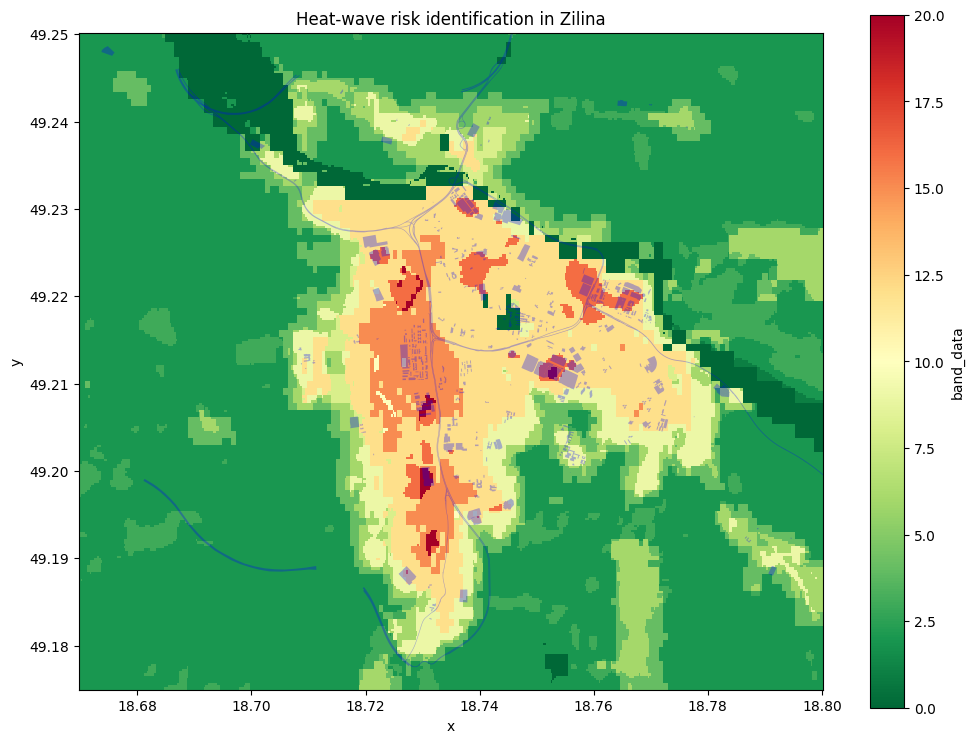

In [6]:
risk=f'{results_dir}/risk_raster_stack.tif'
risk = xr.open_dataset(risk)
risk=risk['band_data']
risk=(risk[0])*(risk[1])
fig, ax=plt.subplots(figsize=(12,9))
risk.plot(ax=ax, cmap='RdYlGn_r')
CI_WGS.plot(ax=ax, color='blue', alpha=0.3)
#CI_centroids2.plot(ax=ax, color='blue')
ax.set_title('Heat-wave risk identification in Zilina')

Save on disk

In [ ]:
risk2.rio.to_raster(raster_path=f'{results_dir}/Heatwave_risk_identificationZA.tif')

# Conclusion

- Based on the risk interpretation map (above), we can identify the places wich are most influenced by the Heat-waves (dark red), for the better visualisation we can load a map with leafmap (below).
- In this notebook we can also learn more about how to adapt to the heat-waves (part 6.), or how to interpret this risk map (risk matrix below)
- The map of the infrastructure (blue) can give us better information about which are we should prioritize, in case of adaptation or wich buildings or squares etc. are most exposed by heat

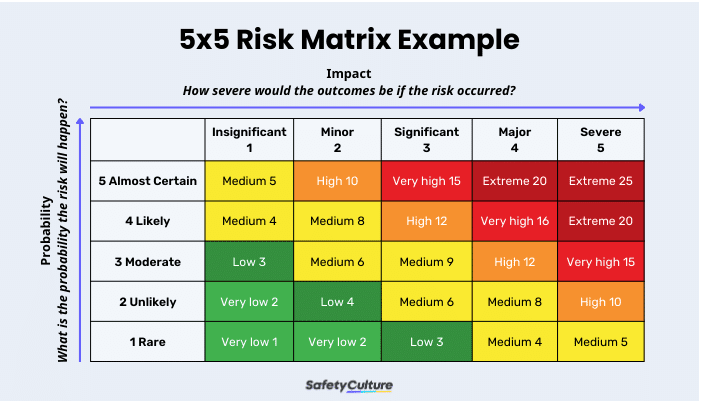

### Interactive mapping

1. https://github.com/banesullivan/localtileserver
2. https://leafmap.org/
3. https://leafmap.org/notebooks/32_local_tile/

This part is only informative, you can upload a maps from the results folder, and use the leafmap gui as an GIS sowftware

In [1]:
import os
import leafmap.leafmap as leafmap

In [2]:
m = leafmap.Map()
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…